## Analyse des données pour le projet de session Machine Learning : 

### Objectif
Analyser des facteurs prédictifs pouvant amener à un étudiant à graduer ou abandonner l'université.

### Importation des librairies nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import json

rcParams['figure.figsize'] = 12, 9

### Fonction pour l'analyse statistique

In [5]:
def analyse_stats_donnee(donnee, colonne, type):
    if type == "Catégorique":
        sns.countplot(donnee, x=colonne)
    elif type == "Numérique":
        sns.histplot(donnee, x=colonne, bins=50)
    
    plt.title(f"Histogramme sur les données ({colonne})")
    plt.xlabel(f"{colonne}")
    plt.ylabel("Fréquence")
    plt.show()

    with open('./donnee_info.json', 'r') as openfile:
        donnee_info = json.load(openfile)

    print(f"Informations intéressantes sur les données de la colonne {colonne} :")
    print("-------------------------------------------------------------------")
    print(donnee[colonne].describe())
    print("\n")
    print(f"Valeurs majoritaire de la colonne ({colonne}) :")
    print("------------------------------------------------")
    if len(donnee[colonne].unique()) == 2:
        top_index = donnee[colonne].value_counts().iloc[:2].index
        top_val = donnee[colonne].value_counts().iloc[:2].values
        if type == "Catégorique":
            print(f"{donnee_info[colonne][str(top_index[0])]} ({top_index[0]}) : {top_val[0]} ({(top_val[0] / donnee[colonne].size)*100:.2f}%)")
            print(f"{donnee_info[colonne][str(top_index[1])]} ({top_index[1]}) : {top_val[1]} ({(top_val[1] / donnee[colonne].size)*100:.2f}%)")
        if type == "Numérique":
            print(f"{top_index[0]} : {top_val[0]} ({(top_val[0] / donnee[colonne].size)*100:.2f}%)")
            print(f"{top_index[1]} : {top_val[1]} ({(top_val[1] / donnee[colonne].size)*100:.2f}%)")
    elif len(donnee[colonne].unique()) >= 3:
        top_index = donnee[colonne].value_counts().iloc[:3].index
        top_val = donnee[colonne].value_counts().iloc[:3].values
        if type == "Catégorique":
            print(f"{donnee_info[colonne][str(top_index[0])]} ({top_index[0]}) : {top_val[0]} ({(top_val[0] / donnee[colonne].size)*100:.2f}%)")
            print(f"{donnee_info[colonne][str(top_index[1])]} ({top_index[1]}) : {top_val[1]} ({(top_val[1] / donnee[colonne].size)*100:.2f}%)")
            print(f"{donnee_info[colonne][str(top_index[2])]} ({top_index[2]}) : {top_val[2]} ({(top_val[2] / donnee[colonne].size)*100:.2f}%)")
        if type == "Numérique":
            print(f"{top_index[0]} : {top_val[0]} ({(top_val[0] / donnee[colonne].size)*100:.2f}%)")
            print(f"{top_index[1]} : {top_val[1]} ({(top_val[1] / donnee[colonne].size)*100:.2f}%)")
            print(f"{top_index[2]} : {top_val[2]} ({(top_val[2] / donnee[colonne].size)*100:.2f}%)")

### Instancier le jeu de données

In [6]:
data = pd.read_csv("./dataset.csv")

### Description du jeu de données :

Cet ensemble de données contient des données provenant d'un établissement d'enseignement supérieur sur diverses variables liées aux étudiants de premier cycle, notamment la démographie, les facteurs socio-économiques et les performances académiques, afin d'étudier l'impact de ces facteurs sur l'abandon scolaire et la réussite scolaire.

- `Etat civil (Catégorique)` :
  - 1 : Célibataire
  - 2 : Marié(e)
  - 3 : Veuf
  - 4 : Divorcé(e)
  - 5 : Union de fait
  - 6 : Séparés légalement
- `Mode d'application (Catégorique)` (À revoir car l'info est complexe) :
  - 1 : 1ère phase – contingent général
  - 2 : Ordonnance No. 612/93 (À voir ça veut dire quoi)
  - 3 : 1ère phase – contingent spécial (île des Açores ou "Azores Island" en anglais)
  - 4 : Titulaires d'autres formations supérieures
  - 5 : Ordonnance No. 854-B/99 (À voir ça veut dire quoi)
  - 6 : Étudiant international (licence ou "bachelor" en anglais)
  - 7 : 1ère phase – contingent spécial (île de Madère ou "Madeira Island" en anglais)
  - 8 : 2e phase – contingent général
  - 9 : 3ème phase – contingent général
  - 10 : Ordonnance No. 533-A/99, point b2) (Plan différent)
  - 11 : Ordonnance No. 533-A/99, point b3) (Autre institution)
  - 12 : Plus de 23 ans
  - 13 : Transfert
  - 14 : Changement de cours ou "Change in course" en anglais
  - 15 : Titulaires d'un diplôme de spécialisation technologique
  - 16 : Changement d'établissement/de cours
  - 17 : Titulaires d'un diplôme de cycle court
  - 18 : Changement d'établissement/de cours (International)
- `L'ordre d'application (Numérique)` :
  - L'ordre dans lequel l'étudiant a postulé (0 - premier choix, et 9 - dernier choix)
  - Valeurs numériques de 0 à 9
- `Cours (Catégorique)` :
  - 1 : Technologies de production de biocarburants
  - 2 : Conception d'animation et multimédia 
  - 3 : Service Social (présence en soirée)
  - 4 : Agronomie
  - 5 : Conception de communications
  - 6 : Soins infirmiers vétérinaires
  - 7 : Génie informatique
  - 8 : Équiniculture
  - 9 : Gestion
  - 10 : Service social
  - 11 : Tourisme
  - 12 : Soins infirmier
  - 13 : Hygiène buccale (Dentiste ou Hygiéniste dentaire) ou "Oral Hygiene" en anglais
  - 14 : Gestion de la publicité et du marketing
  - 15 : Journalisme et communication
  - 16 : Éducation de base ou "Basic Education" en anglais
  - 17 : Gestion (présence en soirée)
- `Présence de jour/soir (Catégorique)` :
  - 0 : Soir ou "Evening" en anglais
  - 1 : Jour ou "Daytime" en anglais
- `Qualification antérieure ou Diplôme antérieure (Catégorique)` :
  - 1 : Étude secondaire
  - 2 : Étude supérieure – baccalauréat
  - 3 : Étude supérieure – diplôme
  - 4 : Étude supérieure – maîtrise
  - 5 : Étude supérieure – doctorat
  - 6 : Fréquence d'étude supérieure ou "Frequency of higher education" en anglais (À revoir)
  - 7 : 12e année de scolarité – non terminée 
  - 8 : 11e année de scolarité – non terminée 
  - 9 : Autre – 11e année de scolarité
  - 10 : 10e année de scolarité
  - 11 : 10e année de scolarité - non terminée
  - 12 : Étude de base de 3e cycle (9ème/10ème/11ème année) ou équivalent
  - 13 : Étude de base de 2e cycle (6e/7e/8e année) ou équivalent
  - 14 : Cours de spécialisation technologique
  - 15 : Étude supérieure – diplôme (1er cycle)
  - 16 : Cours technique supérieur professionnel
  - 17 : Étude supérieure – maîtrise (2e cycle)
- `Nationalité (Catégorique)` :
  - 1 : Portugais
  - 2 : Allemand
  - 3 : Espagnol
  - 4 : Italien
  - 5 : Néerlandais
  - 6 : Anglais (UK)
  - 7 : Lituanien
  - 8 : Angolais
  - 9 : Cap-Verdien
  - 10 : Guinéen
  - 11 : Mozambicain
  - 12 : Santoméen
  - 13 : Turc
  - 14 : Brésilien
  - 15 : Roumain
  - 16 : Moldavie (République de)
  - 17 : Mexicain
  - 18 : Ukrainien
  - 19 : Russe
  - 20 : Cubain
  - 21 : Colombien
- `Qualification de la mère ou du père (Catégorique)` :
  - 1 : Étude secondaire – 12e année de scolarité ou équivalent
  - 2 : Étude supérieure – baccalauréat
  - 3 : Étude supérieure – diplôme
  - 4 : Étude supérieure – maîtrise
  - 5 : Étude supérieure – doctorat
  - 6 : Fréquence d'étude supérieure ou "Frequency of higher education" en anglais (À revoir)
  - 7 : 12e année de scolarité – non terminée 
  - 8 : 11e année de scolarité – non terminée 
  - 9 : 7ème année (ancienne) (À voir ça veut dire quoi)
  - 10 : Autre – 11e année de scolarité
  - 11 : Cours complémentaire de 2ème année du lycée (high school)
  - 12 : 10ème année de scolarité
  - 13 : Cours de commerce général
  - 14 : Étude de base de 3e cycle (9ème/10ème/11ème année) ou équivalent
  - 15 : Cours complémentaire de lycée (high school)
  - 16 : Cours technico-professionnel
  - 17 : Cours complémentaire de lycée (high school) – non terminé
  - 18 : 7ème année de scolarité
  - 19 : 2ème cycle du cursus général du lycée (high school)
  - 20 : 9e année de scolarité – non terminée
  - 21 : 8ème année de scolarité
  - 22 : Cours Général d'Administration et de Commerce
  - 23 : Comptabilité et administration supplémentaires
  - 24 : Inconnu
  - 25 : Ne sait ni lire ni écrire
  - 26 : Savoir lire sans avoir une 4ème année de scolarité
  - 27 : Étude de base de 1er cycle (4e/5e année) ou équivalent
  - 28 : Étude de base de 2e cycle (6e/7e/8e année) ou équivalent
  - 29 : Cours de spécialisation technologique
  - 30 : Étude supérieure – diplôme (1er cycle)
  - 31 : Parcours d'études supérieures spécialisées
  - 32 : Cours technique supérieur professionnel
  - 33 : Étude supérieure – maîtrise (2e cycle)
  - 34 : Étude supérieure – doctorat (3e cycle)
- `Occupation de la mère ou du père (Catégorique)` :
  - 1 : Étudiant
  - 2 : Représentants du Pouvoir Législatif et des Organes Exécutifs, Directeurs et Dirigeants Exécutifs (Pas sûr de la traduction)
  - 3 : Spécialistes en activités intellectuelles et scientifiques
  - 4 : Techniciens et professions de niveau intermédiaire
  - 5 : Personnel administratif
  - 6 : Travailleurs des services personnels, de la sécurité et de la sûreté et vendeurs
  - 7 : Agriculteurs et travailleurs qualifiés de l’agriculture, des pêches et des forêts
  - 8 : Ouvriers qualifiés de l’industrie, de la construction et des artisans
  - 9 : Opérateurs d'installations, de machines et ouvriers d'assemblage
  - 10 : Travailleurs sans compétences
  - 11 : Métiers des Forces armées
  - 12 : Autre situation
  - 13 : (vide)/(blank)
  - 14 : Officiers des Forces armées
  - 15 : Sergents des forces armées
  - 16 : Autres membres des forces armées
  - 17 : Directeurs des services administratifs et commerciaux
  - 18 : Directeurs d'hôtellerie, de restauration, de commerce et autres services
  - 19 : Spécialistes en sciences physiques, mathématiques, ingénierie et techniques connexes
  - 20 : Professionnels de la santé
  - 21 : Enseignants
  - 22 : Spécialistes en finance, comptabilité, organisation administrative et relations publiques et commerciales
  - 23 : Techniciens et professions scientifiques et ingénieries de niveau intermédiaire
  - 24 : Techniciens et professionnels de niveau intermédiaire de la santé
  - 25 : Techniciens de niveau intermédiaire des services juridiques, sociaux, sportifs, culturels et assimilés
  - 26 : Techniciens en technologies de l'information et de la communication
  - 27 : Employés de bureau, secrétaires en général et opérateurs de traitement de données
  - 28 : Opérateurs liés aux données, à la comptabilité, aux statistiques, aux services financiers et aux registres
  - 29 : Autre personnel de soutien administratif
  - 30 : Travailleurs des services personnels
  - 31 : Vendeurs
  - 32 : Travailleurs des soins personnels et autres
  - 33 : Personnel des services de protection et de sécurité
  - 34 : Agriculteurs orientés vers le marché et travailleurs qualifiés en production agricole et animale
  - 35 : Agriculteurs, éleveurs, pêcheurs, chasseurs et cueilleurs et subsistance
  - 36 : Ouvriers du bâtiment qualifiés et assimilés, à l'exception des électriciens
  - 37 : Ouvriers qualifiés en métallurgie, travail des métaux et assimilés
  - 38 : Ouvriers qualifiés en électricité et électronique
  - 39 : Travailleurs de l'industrie agroalimentaire, du travail du bois, de l'habillement et d'autres industries et artisanats
  - 40 : Opérateurs d'installations fixes et de machines
  - 41 : Ouvriers d'assemblage
  - 42 : Conducteurs de véhicules et opérateurs d’équipements mobiles
  - 43 : Travailleurs non qualifiés dans l'agriculture, la production animale, la pêche et la foresterie
  - 44 : Travailleurs non qualifiés dans les industries extractives, la construction, la fabrication et les transports
  - 45 : Assistants à la préparation des repas
  - 46 : Vendeurs de rue (sauf nourriture) et prestataires de services de rue
- `Déplacé (Catégorique)` :
  - Une personne déplacée est un individu contraint de quitter son domicile ou son lieu de résidence habituel pour diverses raisons telles que les conflits, la persécution, les catastrophes naturelles ou les crises d'origine humaine. Ce déplacement peut se faire à l'intérieur de leur propre pays (personne déplacée à l'intérieur de son pays, PDIP) ou à travers les frontières internationales (réfugié)
  - 0 : Non
  - 1 : Oui
- `Besoins éducatifs spéciaux (Catégorique)` :
  - 0 : Non
  - 1 : Oui
- `Débiteur/Dettes (Catégorique)` :
  - `Une personne qui doit une somme d’argent, qui a des dettes`
  - 0 : Non
  - 1 : Oui
- `Frais de scolarité à jour (Catégorique)` :
  - 0 : Non
  - 1 : Oui
- `Sexe (Catégorique)` :
  - 0 : Femme
  - 1 : Homme
- `Bourse scolaire (Catégorique)` :
  - 0 : Non
  - 1 : Oui
- `Âge à l'inscription (Numérique)` :
  - Valeurs numériques de l'âge à l'inscription
- `International (Catégorique)` :
  - 0 : Non
  - 1 : Oui
- `Unités curriculaires 1er semestre (créditées) (Numérique)` :
  - Le nombre d'unités d'études créditées par l'étudiant au premier semestre
- `Unités curriculaires 1er semestre (inscrits) (Numérique)` :
  - Le nombre d'unités d'études inscrites par l'étudiant au premier semestre
- `Unités curriculaires 1er semestre (évaluations) (Numérique)` :
  - Le nombre d'unités d'études évaluées par l'étudiant au premier semestre
- `Unités curriculaires 1er semestre (approuvées) (Numérique)` :
  - Le nombre d'unités d'études approuvées par l'étudiant au premier semestre
- `Unités curriculaires 1er semestre (note) (Numérique)` :
  - ?
- `Unités curriculaires 1er semestre (sans évaluations) (Numérique)` :
  - ?
- `Unités curriculaires 2e semestre (créditées) (Numérique)` :
  - Le nombre d'unités d'études créditées par l'étudiant au second semestre
- `Unités curriculaires 2e semestre (inscrits) (Numérique)` :
  - Le nombre d'unités d'études inscrites par l'étudiant au second semestre
- `Unités curriculaires 2e semestre (évaluations) (Numérique)` :
  - Le nombre d'unités d'études évaluées par l'étudiant au second semestre
- `Unités curriculaires 2e semestre (approuvées) (Numérique)` :
  - Le nombre d'unités d'études approuvées par l'étudiant au second semestre
- `Unités curriculaires 2e semestre (note) (Numérique)` :
  - ?
- `Unités curriculaires 2e semestre (sans évaluations) (Numérique)` :
  - ?
- `Taux de chômage (Numérique)` :
  - Valeur numérique du taux de chômage. Plus il est élevé, plus il y a du chômage
- `Taux d'inflation (Numérique)` :
  - Valeur numérique du taux d'inflation. Si négatif, alors il y a une diminution par rapport à la période antérieure, si positif, il y a une augmentation par rapport à la prériode antérieure
- `PIB (Numérique)` :
  - Le Produit Intérieur Brut (PIB) est un indicateur clé utilisé pour mesurer la performance économique d'un pays. Il représente la valeur totale de tous les biens et services produits à l'intérieur des frontières du pays sur une période spécifique, généralement une année ou un trimestre
- `Cible (Catégorique)`:
  - 0 : Abandonné
  - 1 : Gradué
  - 2 : Inscrit

## Traduction des noms de caractéristiques du jeu de données

In [7]:
# Convertir les noms de caractéristiques en français
nom_fr = {"Marital status": "État civil",
          "Application mode": "Mode d'application",
          "Application order": "Ordre d'application",
          "Course": "Cours", 
          "Daytime/evening attendance": "Présence jour/soir",
          "Previous qualification": "Qualification antérieure",
          "Nacionality": "Nationalité",
          "Mother's qualification": "Qualification mère",
          "Father's qualification": "Qualification père",
          "Mother's occupation": "Occupation mère",
          "Father's occupation": "Occupation père",
          "Displaced": "Déplacé",
          "Educational special needs": "Besoins éducatifs spéciaux",
          "Debtor": "Dettes",
          "Tuition fees up to date": "Frais de scolarité à jour",
          "Gender": "Sexe",
          "Scholarship holder": "Bourse",
          "Age at enrollment": "Âge à l'inscription",
          "International": "International",
          "Curricular units 1st sem (credited)": "Unités curriculaires 1er semestre (créditées)",
          "Curricular units 1st sem (enrolled)": "Unités curriculaires 1er semestre (inscrits)",
          "Curricular units 1st sem (evaluations)": "Unités curriculaires 1er semestre (évaluations)",
          "Curricular units 1st sem (approved)": "Unités curriculaires 1er semestre (approuvées)",
          "Curricular units 1st sem (grade)": "Unités curriculaires 1er semestre (note)",
          "Curricular units 1st sem (without evaluations)": "Unités curriculaires 1er semestre (sans évaluations)",
          "Curricular units 2nd sem (credited)": "Unités curriculaires 2e semestre (créditées)",
          "Curricular units 2nd sem (enrolled)": "Unités curriculaires 2e semestre (inscrits)",
          "Curricular units 2nd sem (evaluations)": "Unités curriculaires 2e semestre (évaluations)",
          "Curricular units 2nd sem (approved)": "Unités curriculaires 2e semestre (approuvées)",
          "Curricular units 2nd sem (grade)": "Unités curriculaires 2e semestre (note)",
          "Curricular units 2nd sem (without evaluations)": "Unités curriculaires 2e semestre (sans évaluations)",
          "Unemployment rate": "Taux de chômage",
          "Inflation rate": "Taux d'inflation",
          "GDP": "PIB",
          "Target": "Cible"}

data = data.rename(columns=nom_fr)
data["Cible"] = data["Cible"].replace("Dropout", 0)
data["Cible"] = data["Cible"].replace("Graduate", 1)
data["Cible"] = data["Cible"].replace("Enrolled", 2)

# Retirer toutes les données où la cible est "Inscrit" (2)
data = data.drop(data[data['Cible'] == 2].index)

data

,État civil,Mode d'application,Ordre d'application,Cours,Présence jour/soir,Qualification antérieure,Nationalité,Qualification mère,Qualification père,Occupation mère,...,Unités curriculaires 2e semestre (créditées),Unités curriculaires 2e semestre (inscrits),Unités curriculaires 2e semestre (évaluations),Unités curriculaires 2e semestre (approuvées),Unités curriculaires 2e semestre (note),Unités curriculaires 2e semestre (sans évaluations),Taux de chômage,Taux d'inflation,PIB,Cible
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


## Analyse des données (Statistique)

In [8]:
# Observer les infos sur les données
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   État civil                                            3630 non-null   int64  
 1   Mode d'application                                    3630 non-null   int64  
 2   Ordre d'application                                   3630 non-null   int64  
 3   Cours                                                 3630 non-null   int64  
 4   Présence jour/soir                                    3630 non-null   int64  
 5   Qualification antérieure                              3630 non-null   int64  
 6   Nationalité                                           3630 non-null   int64  
 7   Qualification mère                                    3630 non-null   int64  
 8   Qualification père                                    3630 non-

In [9]:
# Observer la description des données
data.describe()

,État civil,Mode d'application,Ordre d'application,Cours,Présence jour/soir,Qualification antérieure,Nationalité,Qualification mère,Qualification père,Occupation mère,...,Unités curriculaires 2e semestre (créditées),Unités curriculaires 2e semestre (inscrits),Unités curriculaires 2e semestre (évaluations),Unités curriculaires 2e semestre (approuvées),Unités curriculaires 2e semestre (note),Unités curriculaires 2e semestre (sans évaluations),Taux de chômage,Taux d'inflation,PIB,Cible
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,6.810193,1.750138,9.935537,0.887603,2.552617,1.242424,12.558678,16.663636,7.212948,...,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256,0.608540
std,0.613009,5.253618,1.333831,4.340715,0.315897,3.952440,1.700394,9.006183,10.993025,3.707343,...,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986,0.488144
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,8.000000,1.000000,11.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,18.000000,6.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


### Données démographiques

`État civil`

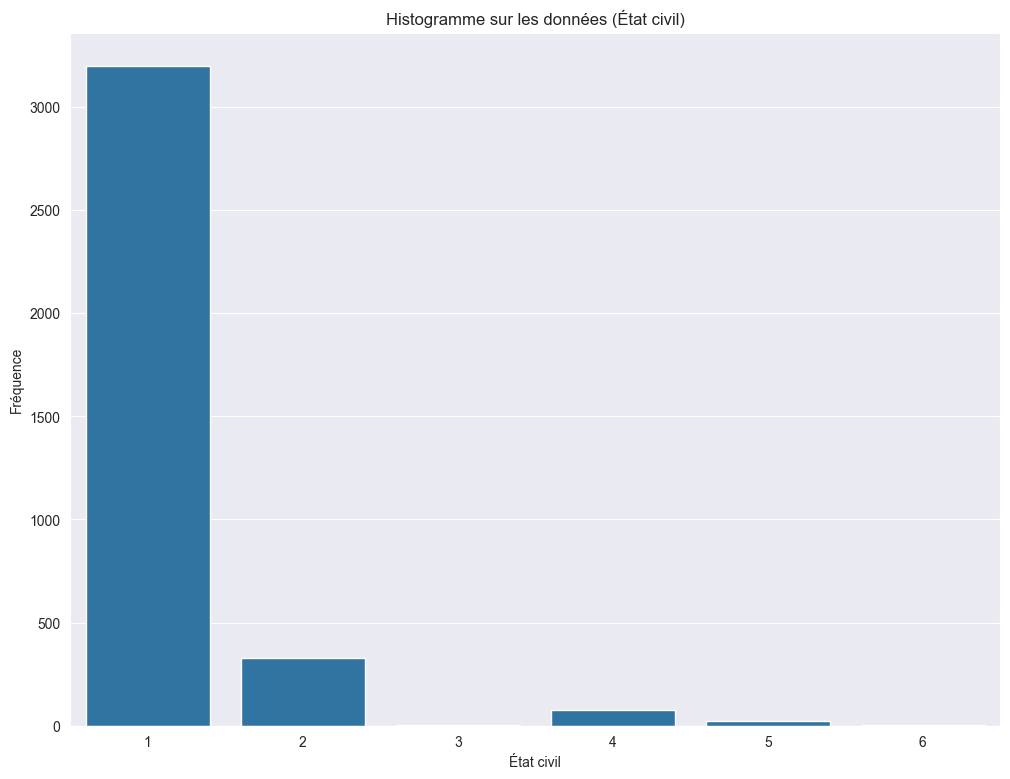

Informations intéressantes sur les données de la colonne État civil :
-------------------------------------------------------------------
count    3630.000000
mean        1.184298
std         0.613009
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: État civil, dtype: float64


Valeurs majoritaire de la colonne (État civil) :
------------------------------------------------


KeyError: 'État civil'

In [10]:
analyse_stats_donnee(data, "État civil", "Catégorique")

`Nationalité`

In [ ]:
analyse_stats_donnee(data, "Nationalité", "Catégorique")

`Déplacé`

In [ ]:
analyse_stats_donnee(data, "Déplacé", "Catégorique")

`Sexe`

In [ ]:
analyse_stats_donnee(data, "Sexe", "Catégorique")

`Âge à l'inscription`

Il est possible d'observer que l'âge à l'inscription est majoritairement entre 17 et 23 ans.

In [ ]:
analyse_stats_donnee(data, "Âge à l'inscription", "Numérique")

`International`

In [ ]:
analyse_stats_donnee(data, "International", "Catégorique")

### Données socioéconomiques

`Qualification père`

In [ ]:
analyse_stats_donnee(data, "Qualification père", "Catégorique")

`Qualification mère`

In [ ]:
analyse_stats_donnee(data, "Qualification mère", "Catégorique")

`Occupation père`

In [ ]:
analyse_stats_donnee(data, "Occupation père", "Catégorique")

`Occupation mère`

In [ ]:
analyse_stats_donnee(data, "Occupation mère", "Catégorique")

`Besoins éducatifs spéciaux`

In [ ]:
analyse_stats_donnee(data, "Besoins éducatifs spéciaux", "Catégorique")

`Dettes`

In [ ]:
analyse_stats_donnee(data, "Dettes", "Catégorique")

`Frais de scolarité à jour`

In [ ]:
analyse_stats_donnee(data, "Frais de scolarité à jour", "Catégorique")

`Bourse`

In [ ]:
analyse_stats_donnee(data, "Bourse", "Catégorique")

### Données macroéconomiques

`Taux de chômage`

In [ ]:
analyse_stats_donnee(data, "Taux de chômage", "Numérique")

`Taux d'inflation`

In [ ]:
analyse_stats_donnee(data, "Taux d'inflation", "Numérique")

`PIB`

In [ ]:
analyse_stats_donnee(data, "PIB", "Numérique")

### Données académiques lors de l’inscription

`Mode d'application`

In [ ]:
analyse_stats_donnee(data, "Mode d'application", "Catégorique")

`Ordre d'application`

In [ ]:
analyse_stats_donnee(data, "Ordre d'application", "Numérique")

`Cours`

In [ ]:
analyse_stats_donnee(data, "Cours", "Catégorique")

`Présence jour/soir`

In [ ]:
analyse_stats_donnee(data, "Présence jour/soir", "Catégorique")

`Qualification antérieure`

In [ ]:
analyse_stats_donnee(data, "Qualification antérieure", "Catégorique")

### Données académiques à la fin du premier semestre

`Unités curriculaires 1er semestre (créditées)`

In [ ]:
analyse_stats_donnee(data, "Unités curriculaires 1er semestre (créditées)", "Numérique")

`Unités curriculaires 1er semestre (inscrits)`

In [ ]:
analyse_stats_donnee(data, "Unités curriculaires 1er semestre (inscrits)", "Numérique")

`Unités curriculaires 1er semestre (évaluations)`

In [ ]:
analyse_stats_donnee(data, "Unités curriculaires 1er semestre (évaluations)", "Numérique")

`Unités curriculaires 1er semestre (approuvées)`

In [ ]:
analyse_stats_donnee(data, "Unités curriculaires 1er semestre (approuvées)", "Numérique")

`Unités curriculaires 1er semestre (note)`

In [ ]:
analyse_stats_donnee(data, "Unités curriculaires 1er semestre (note)", "Numérique")

`Unités curriculaires 1er semestre (sans évaluations)`

In [ ]:
analyse_stats_donnee(data, "Unités curriculaires 1er semestre (sans évaluations)", "Numérique")

### Données académiques à la fin du deuxième semestre

`Unités curriculaires 2e semestre (créditées)`

In [ ]:
analyse_stats_donnee(data, "Unités curriculaires 2e semestre (créditées)", "Numérique")

`Unités curriculaires 2e semestre (inscrits)`

In [ ]:
analyse_stats_donnee(data, "Unités curriculaires 2e semestre (inscrits)", "Numérique")

`Unités curriculaires 2e semestre (évaluations)`

In [ ]:
analyse_stats_donnee(data, "Unités curriculaires 2e semestre (évaluations)", "Numérique")

`Unités curriculaires 2e semestre (approuvées)`

In [ ]:
analyse_stats_donnee(data, "Unités curriculaires 2e semestre (approuvées)", "Numérique")

`Unités curriculaires 2e semestre (note)`

In [ ]:
analyse_stats_donnee(data, "Unités curriculaires 2e semestre (note)", "Numérique")

`Unités curriculaires 2e semestre (sans évaluations)`

In [ ]:
analyse_stats_donnee(data, "Unités curriculaires 2e semestre (sans évaluations)", "Numérique")

### Données Cible

In [ ]:
analyse_stats_donnee(data, "Cible", "Catégorique")